In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nswe_wbmuscl2 as wb2

# Lake at rest

From Berthon and Marche (2008), section 6.3.

The topography is defined by

$$ d(x,y)  = \begin{cases}
0.2 - 0.05(x-10)^2 & \text{ if } 8m < x < 12m \\
0 & \text{ else}
\end{cases}$$

and the water level is set to $0.1m$

In [3]:
nt = 20
nx = 100
cfl = 1.0

In [4]:
x = np.linspace(0,25,nx)
dx = np.diff(x)[0]
d0 = np.where((x>8)*(x<12), 0.2-0.05*(x-10.)**2, 0.0)
h0 = np.where(0.1-d0>=0, 0.1-d0, 0.0)
hu0 = np.zeros_like(h0)

* Initial condition

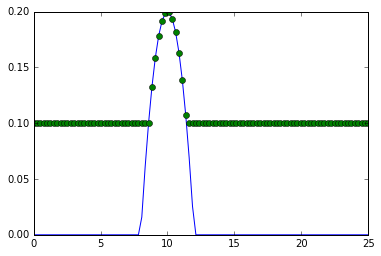

In [5]:
plt.plot(x,d0)
plt.plot(x,h0+d0,'o')

In [6]:
t,h,hu = wb2.sim_rk4(h0, hu0, d0, nt, nx, cfl, dx, wb2.bcs_open, hmin=0.0)

nswe_wbmuscl2.py:262: RuntimeWarning: invalid value encountered in divide
  u_n = np.where(h0[:]>hmin, hu0[:]/h0[:], 0.)


* Difference between computed solution and initial condition 

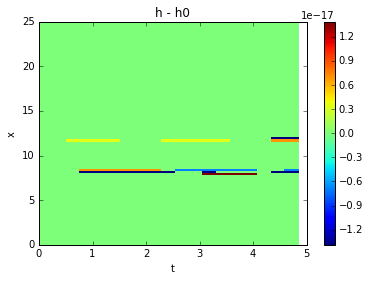

In [7]:
tax, xax = np.meshgrid(t,x)
plt.pcolormesh(tax.T,xax.T,np.array([h[i,2:-2]-h[0,2:-2] for i in range(h.shape[0])]))
plt.colorbar()
plt.title('h - h0')
plt.xlabel('t')
plt.ylabel('x')

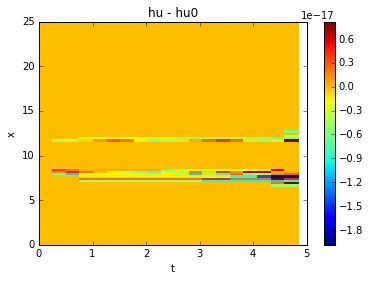

In [8]:
plt.pcolormesh(tax.T,xax.T,np.array([hu[i,2:-2]-hu[0,2:-2] for i in range(h.shape[0])]))
plt.colorbar()
plt.title('hu - hu0')
plt.xlabel('t')
plt.ylabel('x')

* Animation of the simulation


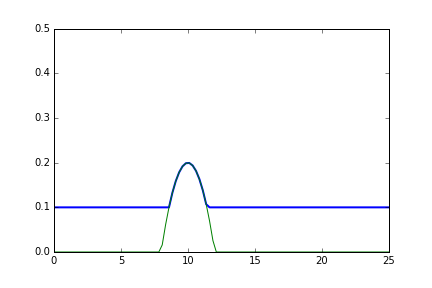
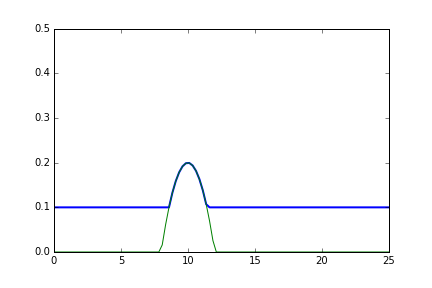
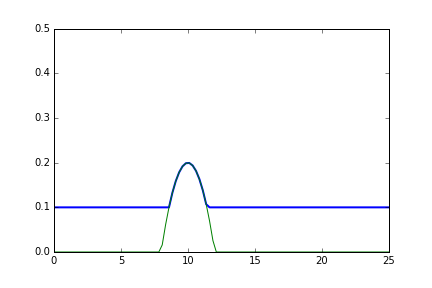
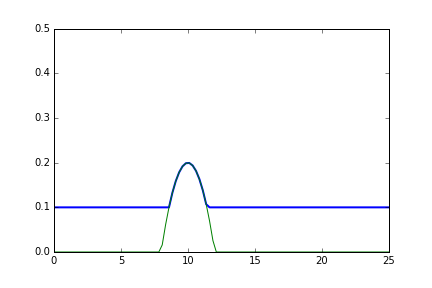
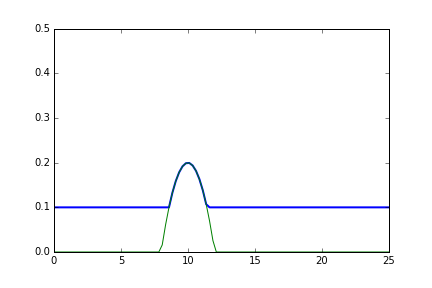
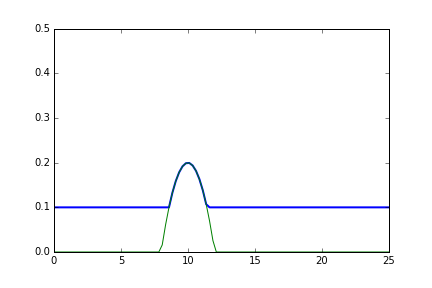
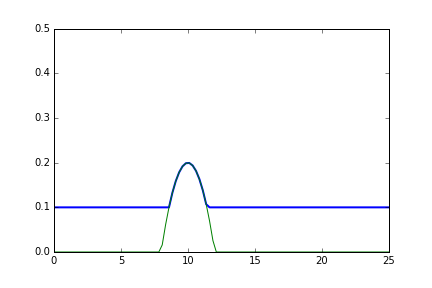
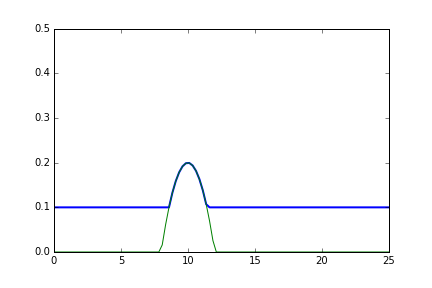
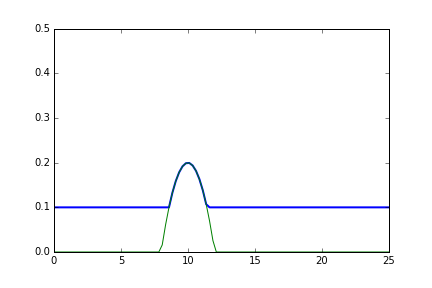
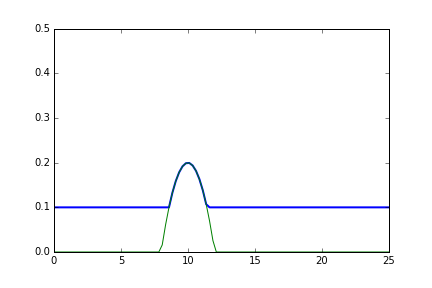
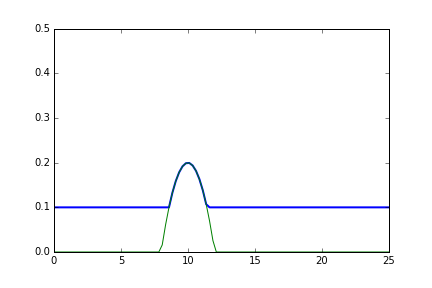
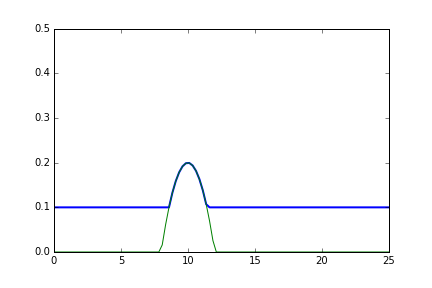
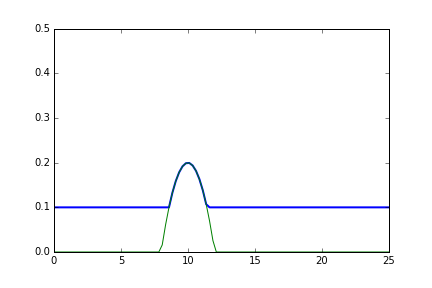
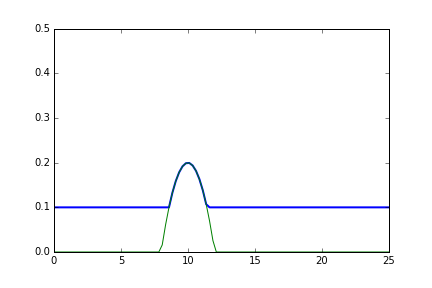
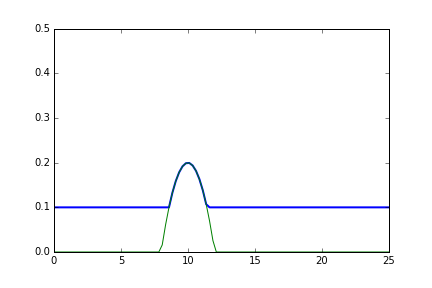
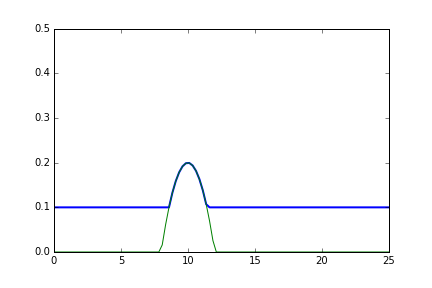
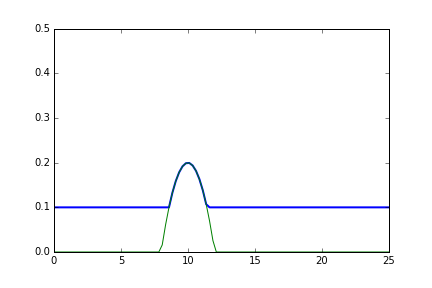
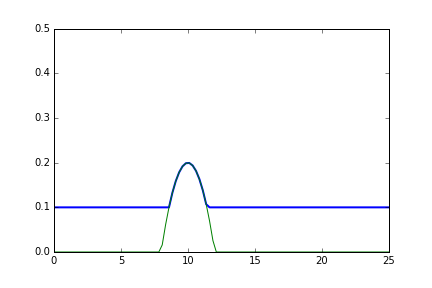
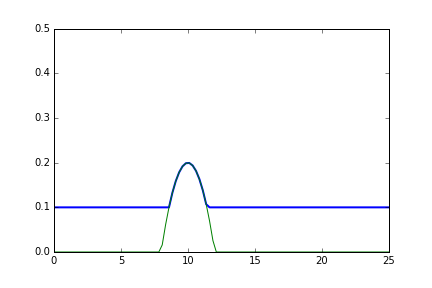

In [9]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure()
ax = plt.axes(xlim=(0, 25), ylim=(0.0,0.5))
line, = ax.plot([], [], lw=2)
lineb, = ax.plot(x,d0)

def animate(i):
    line.set_data(x, h[i,2:-2]+d0)
    return line,

animation.FuncAnimation(fig, animate, frames=nt-1, interval=45)

# Sinusoidal wave propagation in shallow water

The boundary condition is defined as follows:

Given $h_b(t)$ the water height at the boundary, the value to use in the first ghost cell is $$h_L = h_b(t+\Delta t)$$ and for $hu$ is $$(hu)_L = c_0 (h_L-h_0)$$ with $h_0$ the mean water level.

In [10]:
def bcs_inwave_open(d,h0,hu0,href,hwave,t,dt):
    """ 
        incident wave height at the left boundary
        open at the right boundary
    """
    hl  = hwave(t+dt)
    hul = np.sqrt(9.81*href)*(hl-href)
    ul = hul/hl
    hr = h0[2]
    hur = hu0[2]
    ur = hur/hr    
    
    Rlplus = ul + 2.*np.sqrt(9.81*hl)
    Rrminus = ur - 2.*np.sqrt(9.81*hr)
    
    ua = 0.5*(Rlplus + Rrminus)
    ha = 1./(16.*9.81)*(Rlplus-Rrminus)**2
    
    db = 1.*d
    hb = 1.*h0
    hub = 1.*hu0
    db[0] = db[2]
    db[1] = db[2]
    hb[0] = ha
    hb[1] = ha
    hub[0] = ha*ua
    hub[1] = ha*ua
    
    db[-1] = db[-4]
    db[-2] = db[-3]
    hb[-1] = hb[-4]
    hb[-2] = hb[-3]
    hub[-1] = hub[-4]    
    hub[-2] = hub[-3]    
    return db,hb,hub

In [11]:
nt = 100
nx = 50
cfl = 1.0

(0, 11)

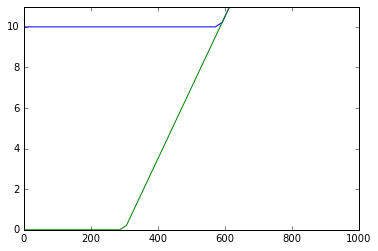

In [12]:
x = np.linspace(0,1000,nx)
H0 = 10.
T = 0.5
a = 0.1

d0 = np.where((x>=300), 0.035*(x-300),0.0)
h0 = H0-d0
h0 = np.where(h0<=0,1e-5,h0)
hu0 = np.zeros_like(x)
plt.plot(x,h0+d0)
plt.plot(x,d0)
plt.ylim(0,11)

In [13]:
def sinwave(t):
    return np.sin(t/T*2.*np.pi)*a+H0

In [14]:
t, h,hu = wb2.sim_rk4(h0, hu0, d0, nt, nx, cfl, dx, bcs=bcs_inwave_open, bcargs=[H0,sinwave], hmin=1e-5)

nswe_wbmuscl2.py:263: RuntimeWarning: invalid value encountered in sqrt
  s = np.max(np.abs(u_n)+np.sqrt(9.81*h0[:]))
nswe_wbmuscl2.py:262: RuntimeWarning: invalid value encountered in greater
  u_n = np.where(h0[:]>hmin, hu0[:]/h0[:], 0.)


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan



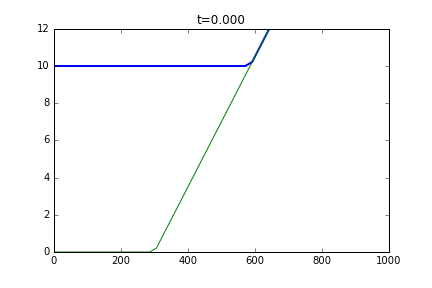
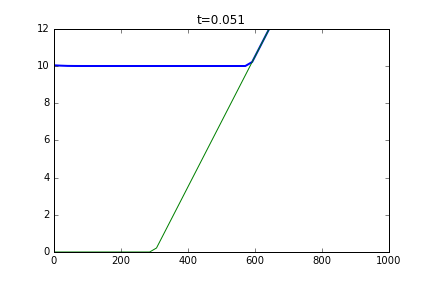
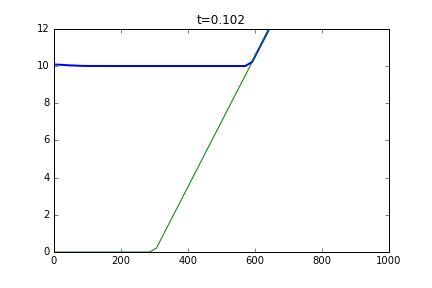
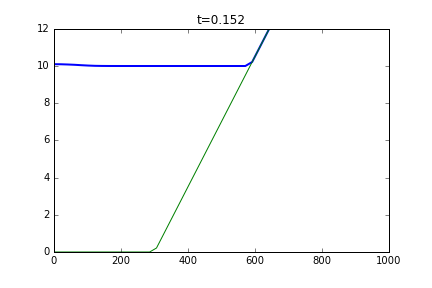
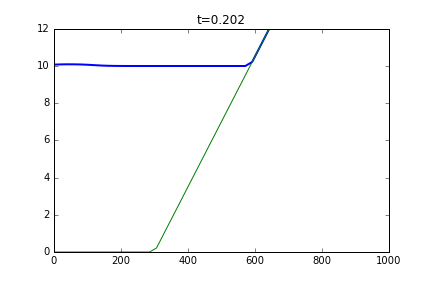
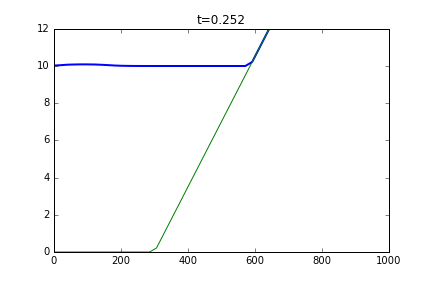
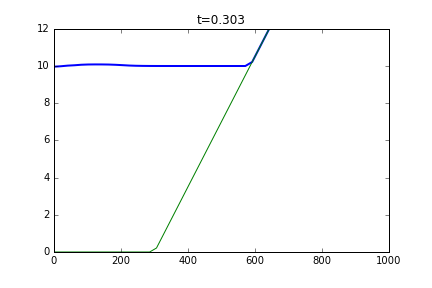
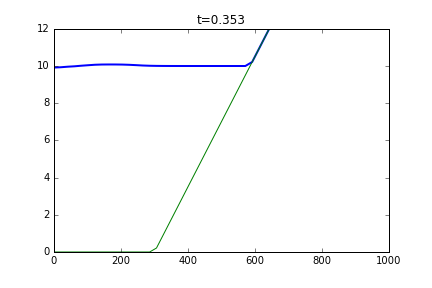
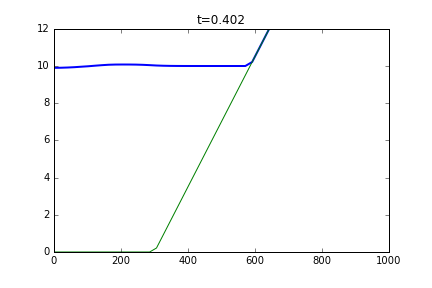
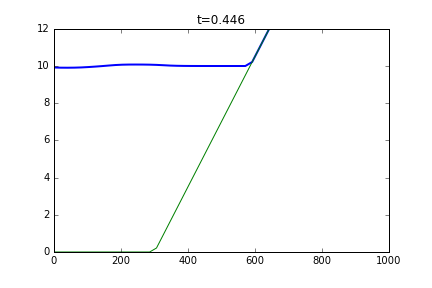
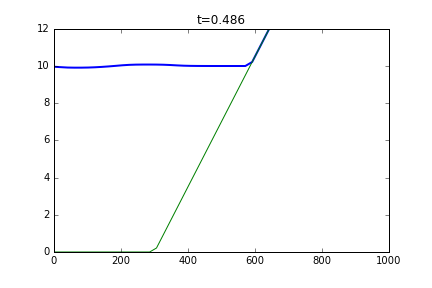
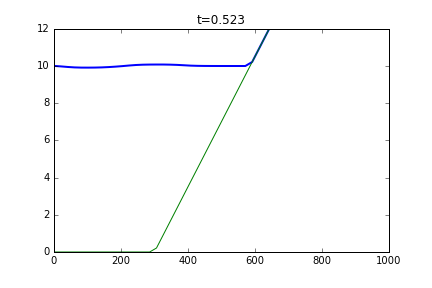
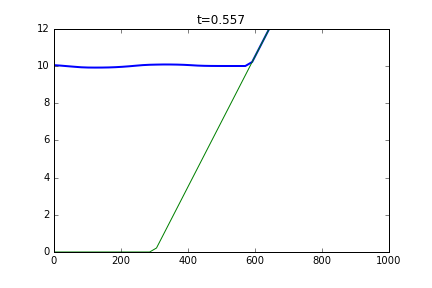
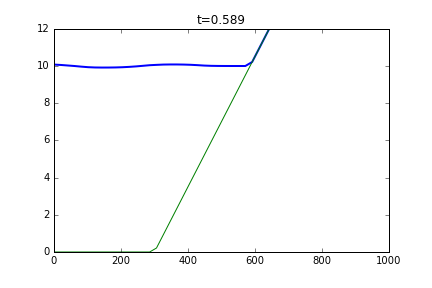
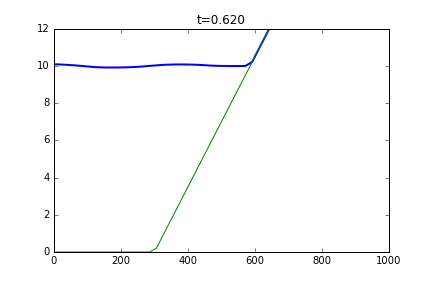
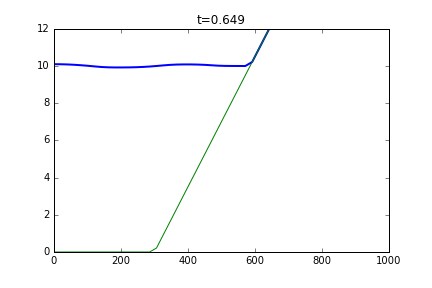
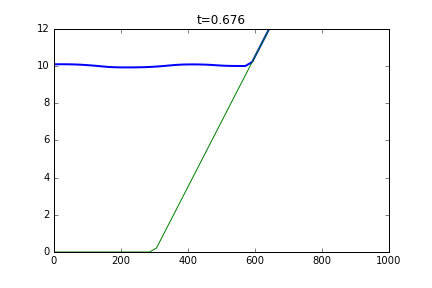
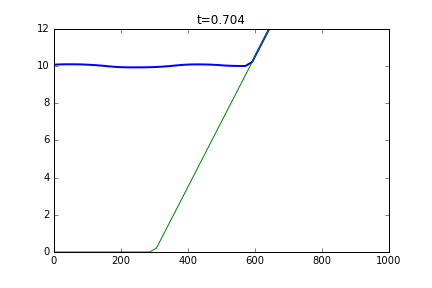
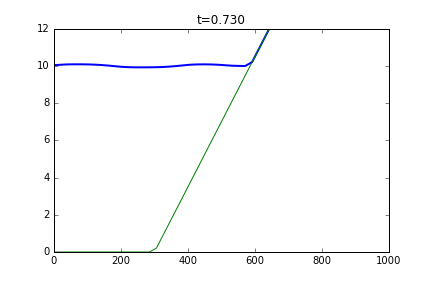
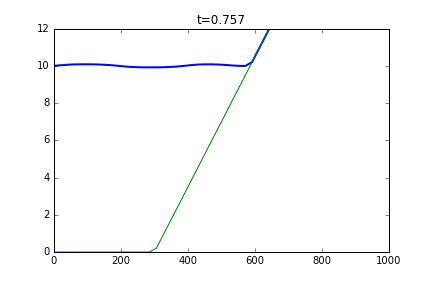
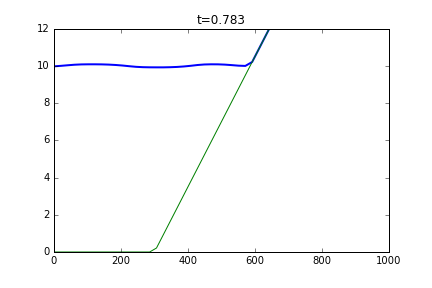
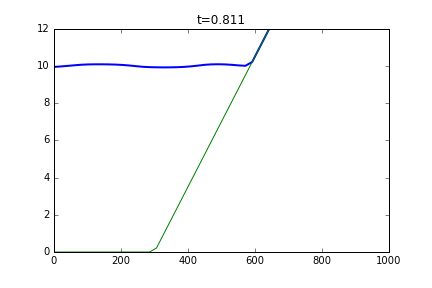
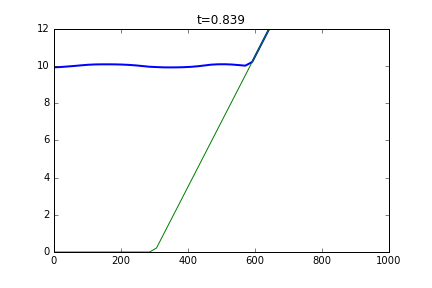
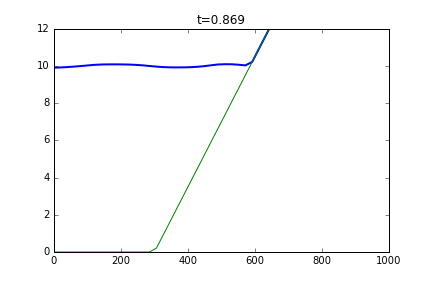
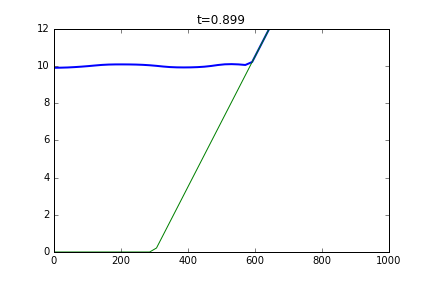
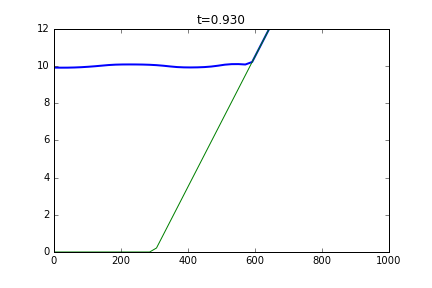
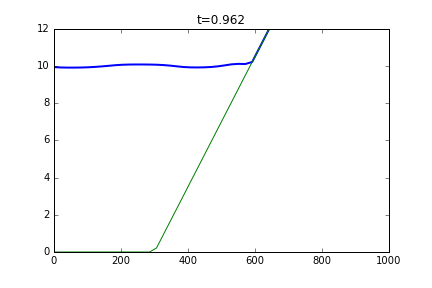
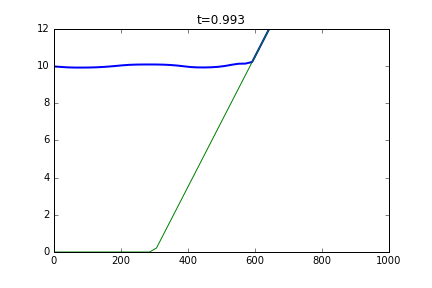
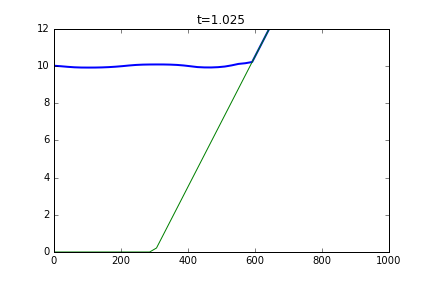
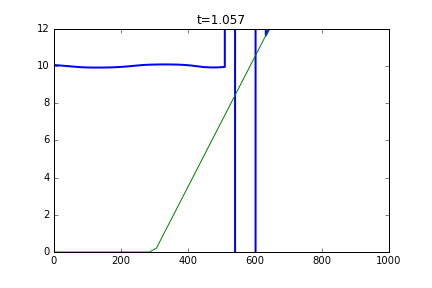
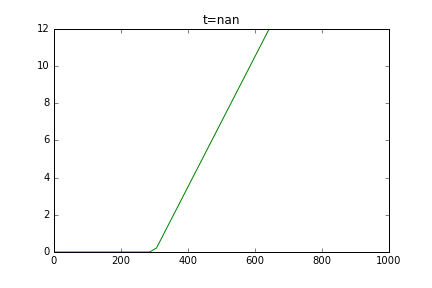
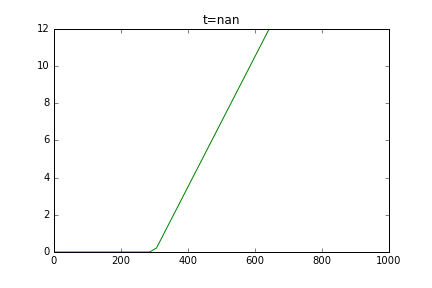
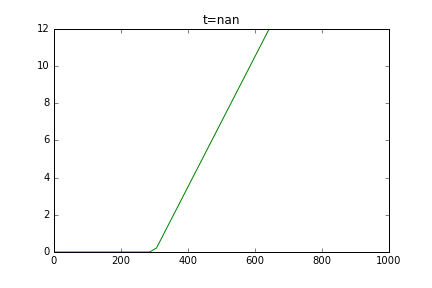
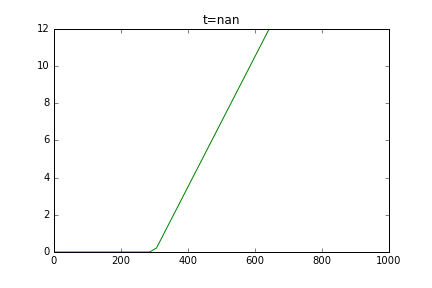
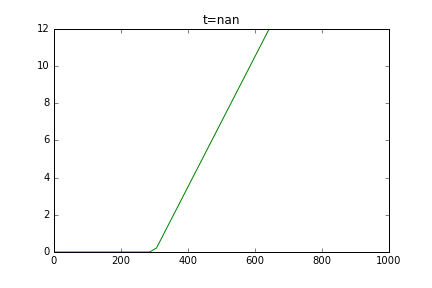
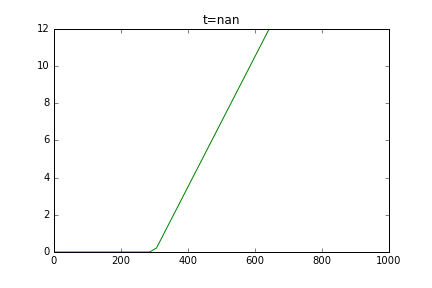
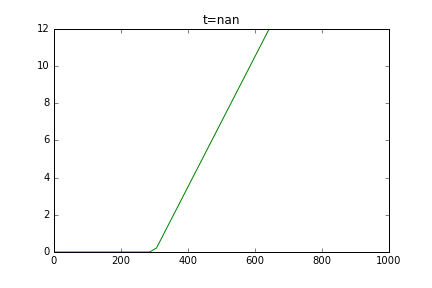
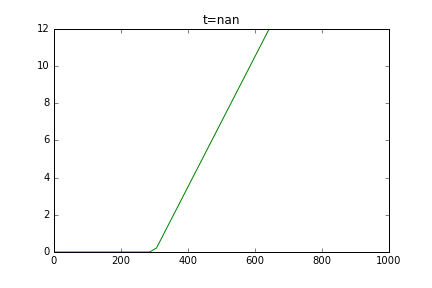
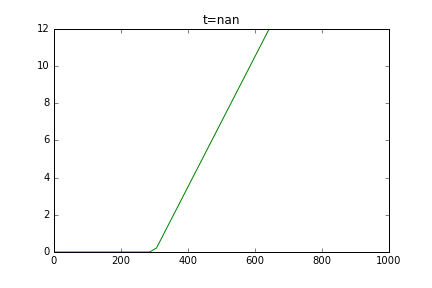
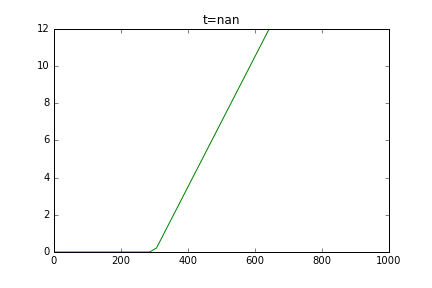
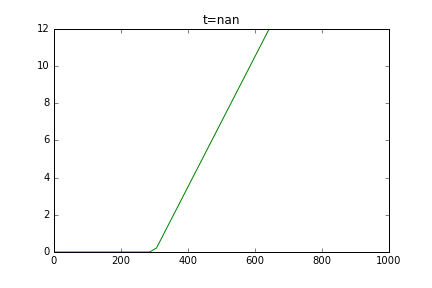
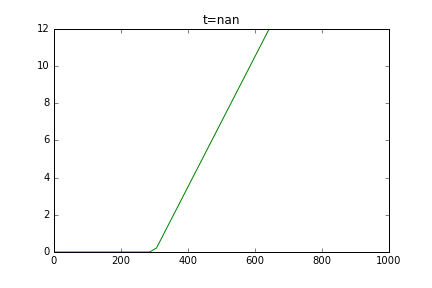
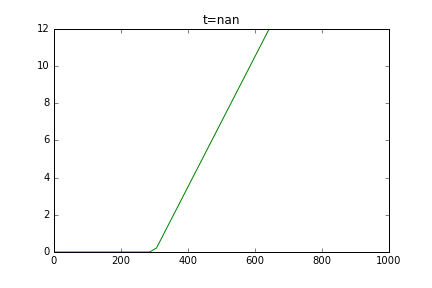
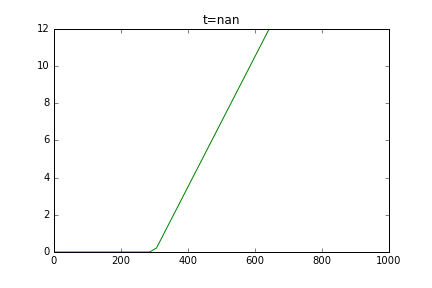
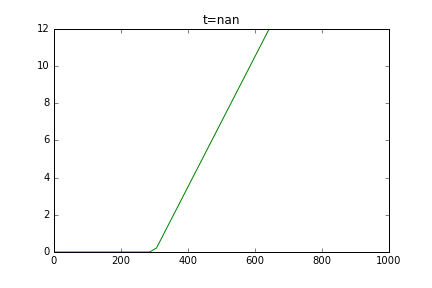
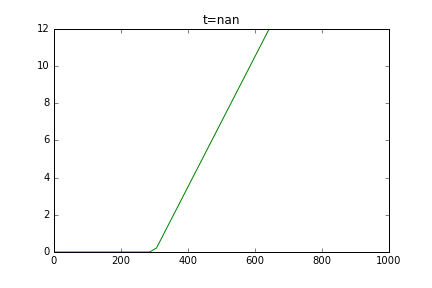
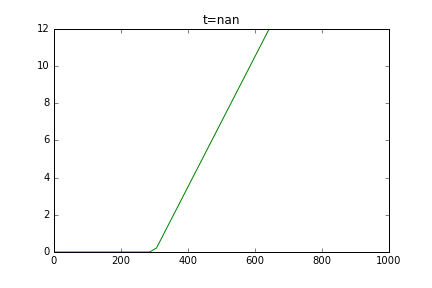
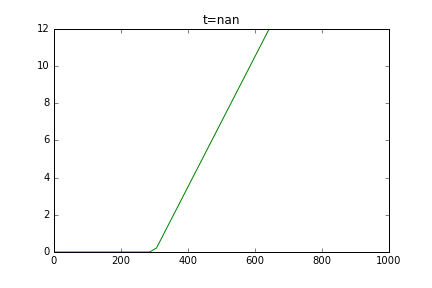
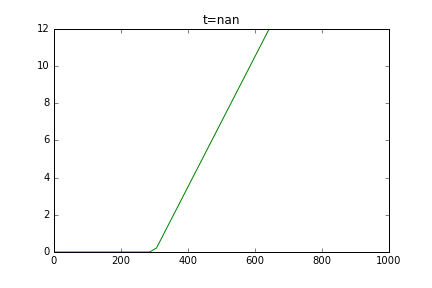
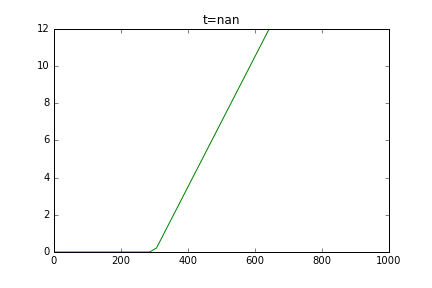

In [15]:
fig = plt.figure()
ax = plt.axes(xlim=(0, x.max()), ylim=(0.0,12.))
line, = ax.plot([], [], lw=2)
lineb, = ax.plot(x,d0)
tt = ax.set_title('t')
def animate(i):
    i = min(nt,i*2)
    line.set_data(x, h[i,2:-2]+d0)
    tt.set_text('t=%.3f'%t[i])
    return line,

animation.FuncAnimation(fig, animate, frames=nt/2, interval=45)

# Subcritical flow over a bump

Given $q_b(t)$ the water flow at the boundary, the value to use in the first ghost cell is $$hu_L = q_b(t+\Delta t)$$ and the water height is $$h_L = h_0 + \frac{q_L}{c_0}$$


In [16]:
def bcs_inflow(d,h0,hu0,hin,qin,t,dt):
    """ 
        incident wave height at the left boundary
        open at the right boundary
    """
    hl  = qin/hin
    hul = qin
    ul = hul/hl
    hr = h0[2]
    hur = hu0[2]
    ur = hur/hr    
    
    Rlplus = ul + 2.*np.sqrt(9.81*hl)
    Rrminus = ur - 2.*np.sqrt(9.81*hr)
    
    ua = 0.5*(Rlplus + Rrminus)
    ha = 1./(16.*9.81)*(Rlplus-Rrminus)**2
    
    db = 1.*d
    hb = 1.*h0
    hub = 1.*hu0
    db[0] = db[2]
    db[1] = db[2]
    hb[0] = ha
    hb[1] = ha
    hub[0] = ha*ua
    hub[1] = ha*ua
    
    
    hr = hin
    hur = 0.0
    hl = h0[-3]
    hul = hu0[-3]
    ul = hul/hl

    Rlplus = ul + 2.*np.sqrt(9.81*hl)
    Rrminus = ur - 2.*np.sqrt(9.81*hr)

    ua = 0.5*(Rlplus + Rrminus)
    ha = 1./(16.*9.81)*(Rlplus-Rrminus)**2
    
    db[-1] = db[-4]
    db[-2] = db[-4]
    hb[-1] = ha
    hb[-2] = ha
    hub[-1] = ha*ua
    hub[-2] = ha*ua
    
    return db,hb,hub

(0, 2.1)

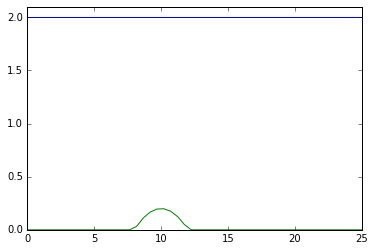

In [17]:
nt = 100
nx = 50
H0 = 2.
q0 = 4.42
x = np.linspace(0,25,50)
d0 = np.where((x<=12.)*(x>=8), 0.2-0.05*(x-10.)**2,0.0)
h0 = H0-d0
hu0 = np.ones_like(x)*4.42
plt.plot(x,h0+d0)
plt.plot(x,d0)
plt.ylim(0,2.1)

In [18]:
tw, hw,huw = wb2.sim_rk4(h0, hu0, d0, nt*4, nx, cfl, dx, bcs=bcs_inflow, bcargs=[H0,q0])


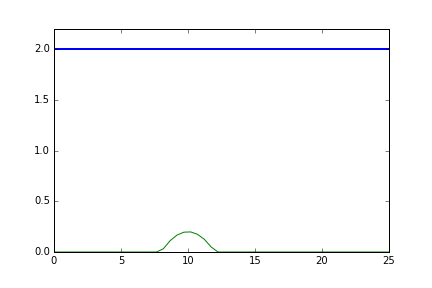
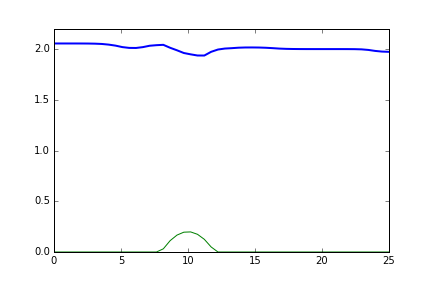
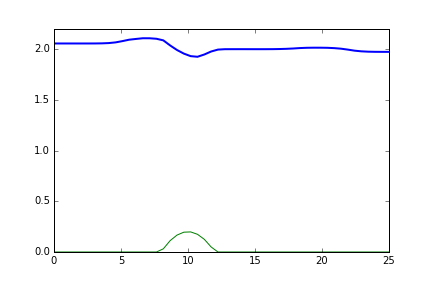
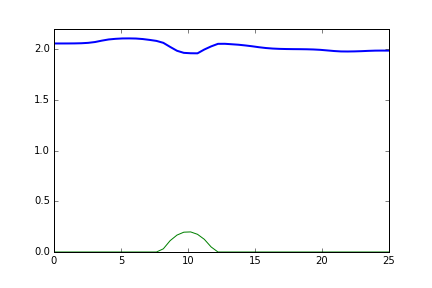
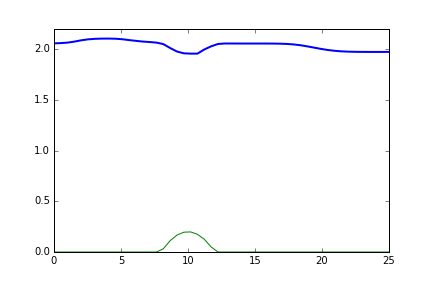
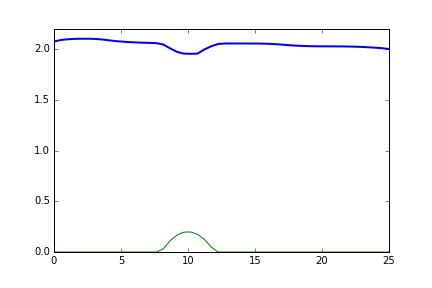
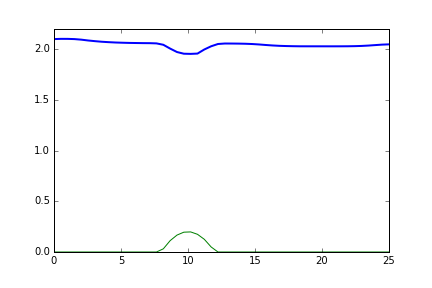
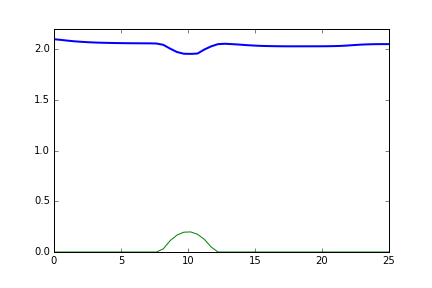
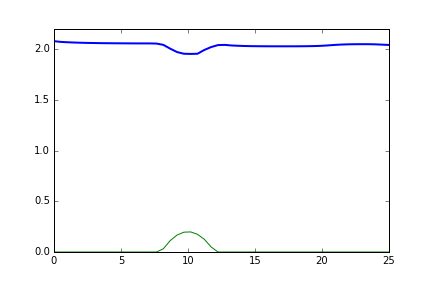
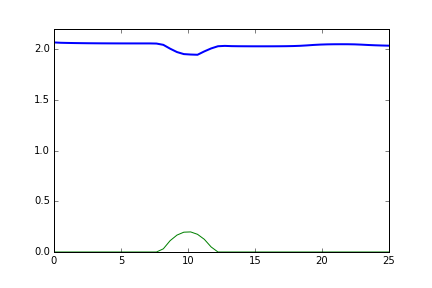
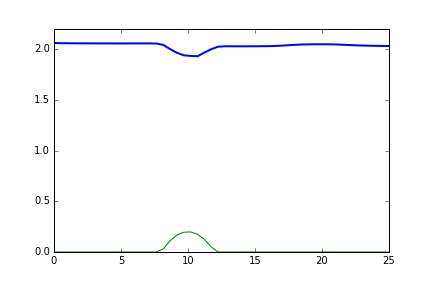
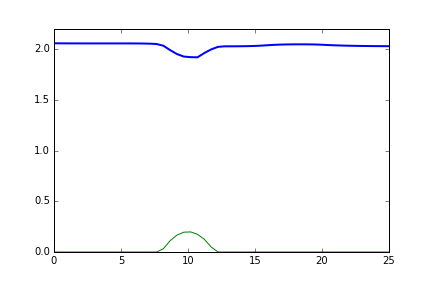
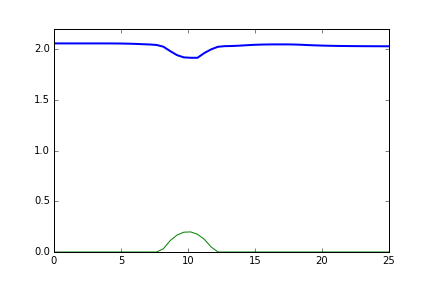
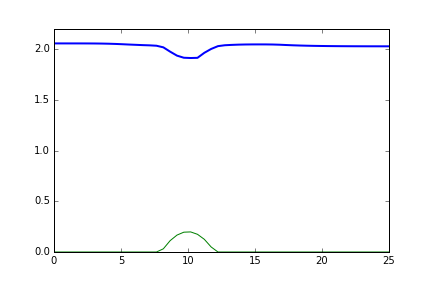
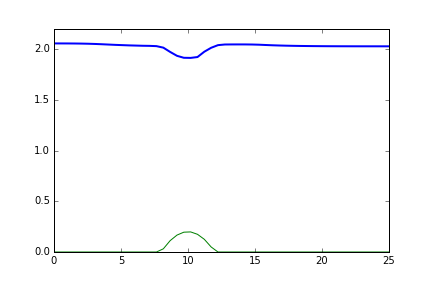
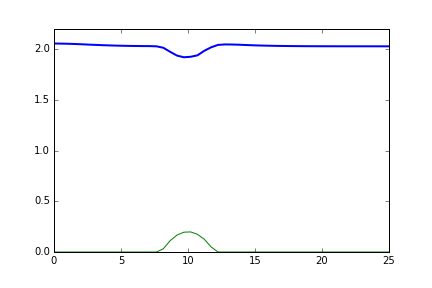
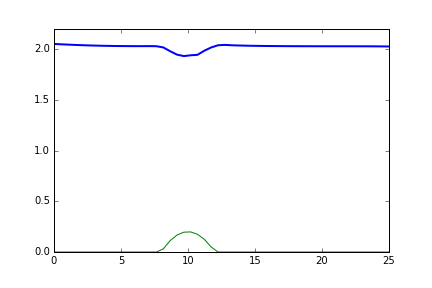
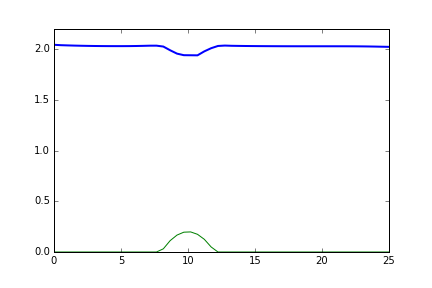
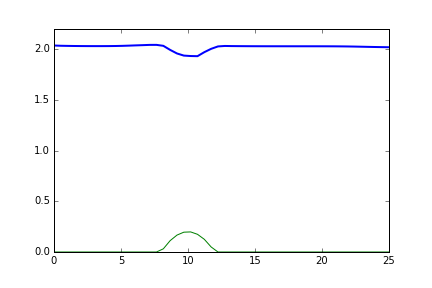
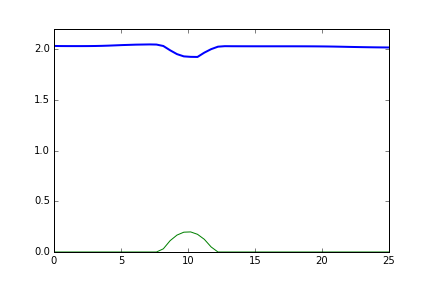
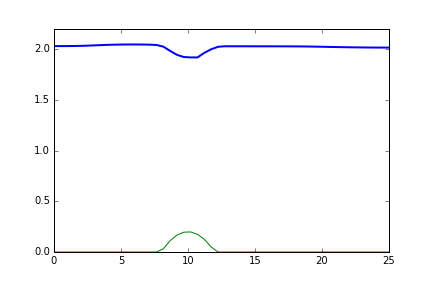
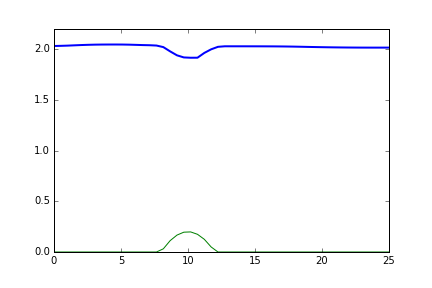
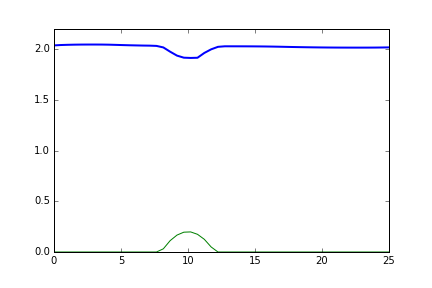
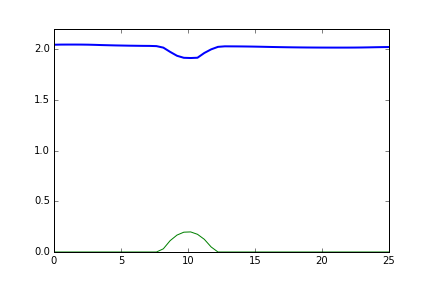
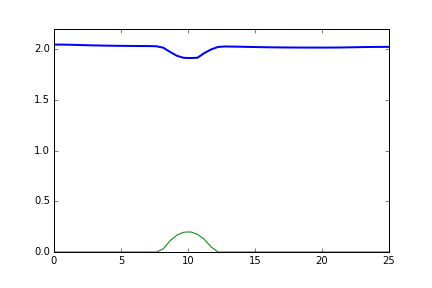
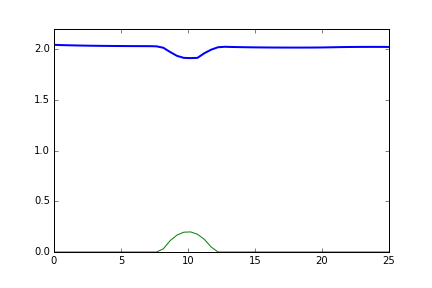
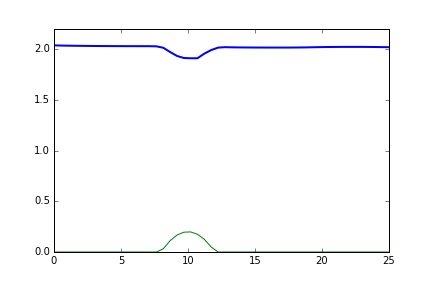
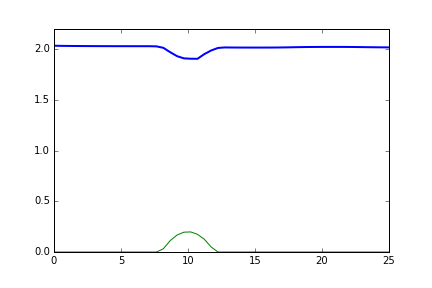
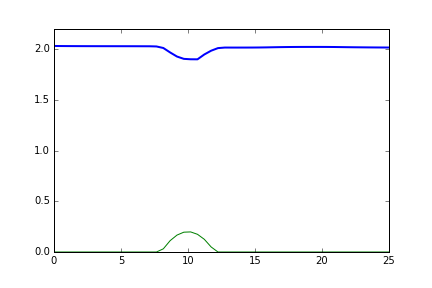
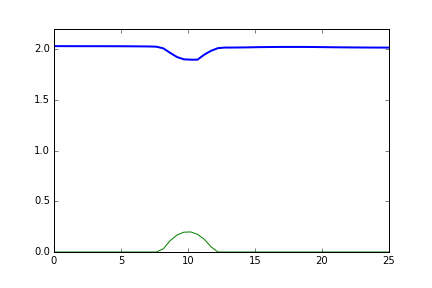
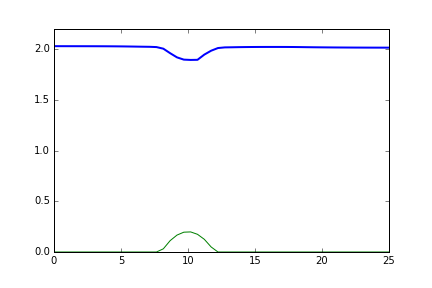
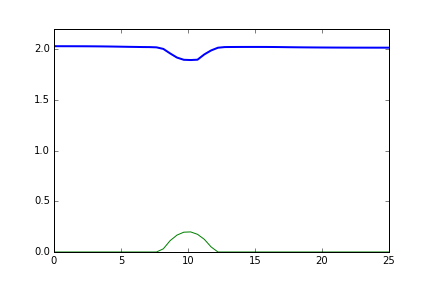
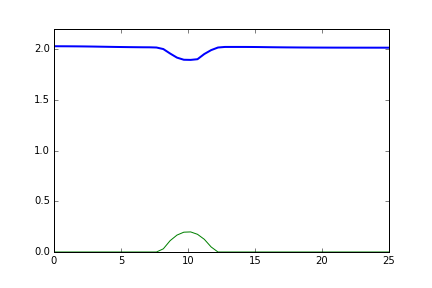
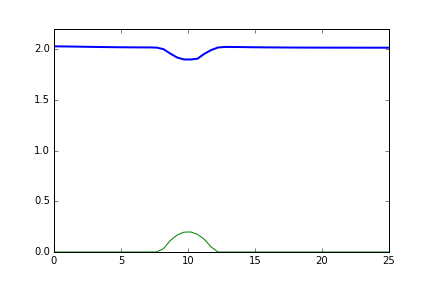
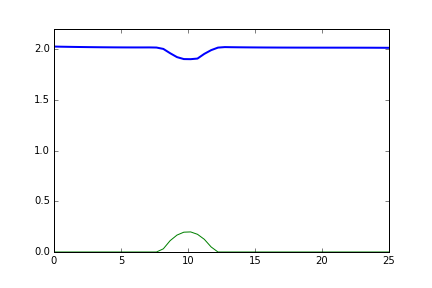
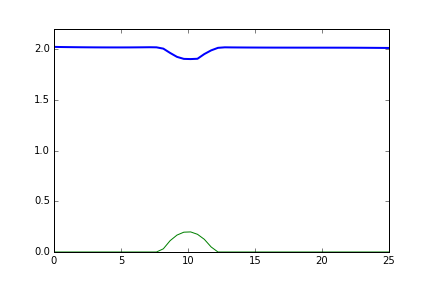
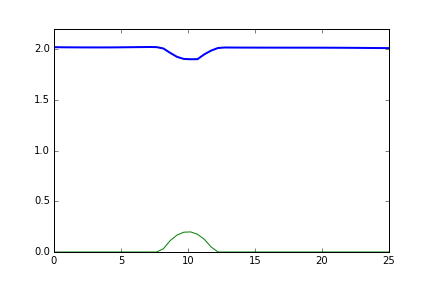
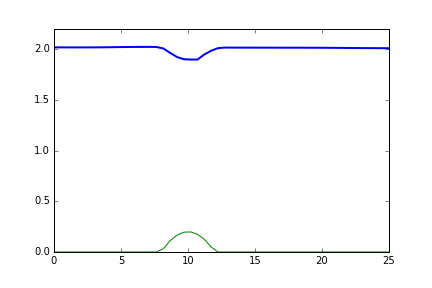
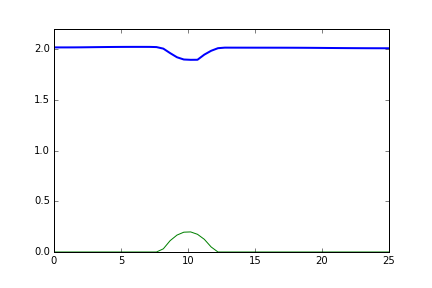

In [19]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 25), ylim=(0.0,H0*1.1))
line, = ax.plot([], [], lw=2)
lineb, = ax.plot(x,d0)

def animate(i):
    i = min(nt*4-1,i*10)
    line.set_data(x, hw[i,2:-2]+d0)
    return line,

animation.FuncAnimation(fig, animate, frames=(nt*4-1)/10, interval=45)

In [20]:
def b(x):
    d0 = np.where((x>8)*(x<12), 0.2-0.05*(x-10.)**2, 0.0)
    return d0
def tosolve(h,x,q):
    eq = h + b(x) + q**2/(2.*9.81*h**2) - (H0+b(0)+q**2/(2.*9.81*H0**2))
    return eq

In [21]:
from scipy.optimize import fsolve

In [22]:
ha = np.array([ fsolve(tosolve,H0,args=(x[i],q0)) for i in range(x.shape[0])])

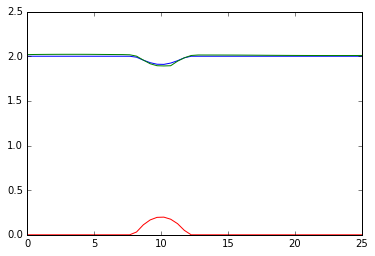

In [23]:
plt.plot(x,(ha[:,0]+d0));
plt.plot(x,hw[-1,2:-2]+d0)
plt.plot(x,d0)
